In [1]:
import numpy as np
import scipy.io
from cvxpy import *
import matplotlib.pyplot as plt
import pandas as pd 
import fancyimpute
from sklearn.utils.extmath import randomized_svd

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [1164]:
###importing actual data###
raw_data = pd.read_csv('Votes9701.csv', quotechar='"', skipinitialspace=True)

#breaking down into constituent parts
raw_data_np = raw_data.as_matrix()

names = raw_data_np[:,0]
party = raw_data_np[:,1]
votes = raw_data_np[:,2:]

#two_parties = (party == 'Lab') + (party == 'Con')

#votes = votes[two_parties]
#party = party[two_parties]
#names = names[two_parties]

#cleaning votes
votes[votes == 'y'] = 1
votes[votes == 'n'] = 0
#guessing b is no
votes[votes == 'b'] = '-'
votes[votes == '-'] = np.nan
votes[party == '-'] = np.nan

#this person never votes
no_voter = np.argwhere(np.nansum(votes, axis = 1) == 0)
votes = np.delete(votes, no_voter, 0)
names = np.delete(names, no_voter, 0)
party = np.delete(party, no_voter, 0)

#eliminating low voters
no_voter = np.argwhere(np.nansum(votes, axis = 1) < 25)
votes = np.delete(votes, no_voter, 0)
names = np.delete(names, no_voter, 0)
party = np.delete(party, no_voter, 0)

#labeling those in opposition
opposition = party != 'Lab'
opposition = np.where(opposition == True, 1,0)
opposition = opposition.reshape(len(opposition),1)

pol_number = names.shape[0]
issue_number = votes.shape[1]

votes = votes.astype('float')
#labor_voter_votes = labor_voter_votes.astype('float')
opposition = opposition.astype('float')
oppos = (opposition == 1).reshape(-1,)
cons = (party == 'Con').reshape(-1,)
dups = ((party == 'DUP') + (party == 'UUP')).reshape(-1,)
snp = (party == 'SNP').reshape(-1,)
ukup = (party == 'UKUP').reshape(-1,)
ld = (party == 'LD').reshape(-1,)

np.savetxt("votes.csv", votes.round(), delimiter=",")

In [1142]:
rebels = (names == 'Corbyn, Jeremy ') + (names == 'Skinner, Dennis ') + (names == 'Marshall-Andrews, Robert ') +(names == 'Dalyell, Tam ') + (names == 'Abbott, Diane ') +(names == 'Benn, Tony (Che)') +(names == 'Livingstone, Ken ') + (names == 'Grant, Bernie ')

In [526]:
#true if I want to exclude it!
def maskf(x,p):
    rand = np.random.rand()
    if x == True:
        if rand < p:
            return True
        else:
            return False
    else:
        return False

 #training data   
mask_big = (~np.isnan(votes)).copy()    

for one in range((~np.isnan(votes)).shape[0]):
    for two in range((~np.isnan(votes)).shape[1]):
        mask_big[one,two]  = maskf(mask_big[one,two],.2)
        
mask_small = mask_big.copy()   

for one in range((~np.isnan(votes)).shape[0]):
    for two in range((~np.isnan(votes)).shape[1]):
        mask_small[one,two]  = maskf(mask_small[one,two],.5)

#Val data
mask1 = mask_big.copy()
mask1[mask_small] = False

#test data
mask2 = mask_small.copy()


In [514]:
votes_test2 = votes.copy()
votes_test2[mask_big] = np.nan
np.savetxt("votes_mask.csv", votes_test2.round(), delimiter=",")
train_loc = np.logical_and(~np.isnan(votes),~mask_big)

In [530]:
lambdas = [.01,.5,1,3,5]
val_perf = []

for this_lam in lambdas:
    
    X_incomplete_normalized = votes_test2.copy()
    X_filled_softimpute = fancyimpute.SoftImpute(shrinkage_value = this_lam,max_iters=250, verbose=True, min_value =0, max_value = 1).fit_transform(X_incomplete_normalized)
    val_perf.append((X_filled_softimpute[mask1].round() == votes[mask1]).sum()/mask1.sum())

[SoftImpute] Max Singular Value of X_init = 296.311475
[SoftImpute] Iter 1: observed MAE=0.000193 rank=664
[SoftImpute] Iter 2: observed MAE=0.000193 rank=664
[SoftImpute] Iter 3: observed MAE=0.000193 rank=664
[SoftImpute] Iter 4: observed MAE=0.000193 rank=664
[SoftImpute] Iter 5: observed MAE=0.000193 rank=664
[SoftImpute] Iter 6: observed MAE=0.000193 rank=664
[SoftImpute] Iter 7: observed MAE=0.000193 rank=664
[SoftImpute] Iter 8: observed MAE=0.000193 rank=664
[SoftImpute] Iter 9: observed MAE=0.000193 rank=664
[SoftImpute] Iter 10: observed MAE=0.000193 rank=664
[SoftImpute] Iter 11: observed MAE=0.000193 rank=664
[SoftImpute] Iter 12: observed MAE=0.000193 rank=664
[SoftImpute] Iter 13: observed MAE=0.000193 rank=664
[SoftImpute] Iter 14: observed MAE=0.000193 rank=664
[SoftImpute] Iter 15: observed MAE=0.000193 rank=664
[SoftImpute] Iter 16: observed MAE=0.000193 rank=664
[SoftImpute] Iter 17: observed MAE=0.000193 rank=664
[SoftImpute] Iter 18: observed MAE=0.000193 rank=664


[SoftImpute] Iter 154: observed MAE=0.000195 rank=664
[SoftImpute] Iter 155: observed MAE=0.000195 rank=664
[SoftImpute] Iter 156: observed MAE=0.000195 rank=664
[SoftImpute] Iter 157: observed MAE=0.000195 rank=664
[SoftImpute] Iter 158: observed MAE=0.000195 rank=664
[SoftImpute] Iter 159: observed MAE=0.000195 rank=664
[SoftImpute] Iter 160: observed MAE=0.000195 rank=664
[SoftImpute] Iter 161: observed MAE=0.000195 rank=664
[SoftImpute] Iter 162: observed MAE=0.000195 rank=664
[SoftImpute] Iter 163: observed MAE=0.000195 rank=664
[SoftImpute] Iter 164: observed MAE=0.000195 rank=664
[SoftImpute] Iter 165: observed MAE=0.000195 rank=664
[SoftImpute] Iter 166: observed MAE=0.000195 rank=664
[SoftImpute] Iter 167: observed MAE=0.000195 rank=664
[SoftImpute] Iter 168: observed MAE=0.000195 rank=664
[SoftImpute] Iter 169: observed MAE=0.000195 rank=664
[SoftImpute] Iter 170: observed MAE=0.000195 rank=664
[SoftImpute] Iter 171: observed MAE=0.000195 rank=664
[SoftImpute] Iter 172: obser

[SoftImpute] Iter 55: observed MAE=0.007902 rank=365
[SoftImpute] Iter 56: observed MAE=0.007795 rank=358
[SoftImpute] Iter 57: observed MAE=0.007689 rank=353
[SoftImpute] Iter 58: observed MAE=0.007583 rank=346
[SoftImpute] Iter 59: observed MAE=0.007478 rank=339
[SoftImpute] Iter 60: observed MAE=0.007374 rank=334
[SoftImpute] Iter 61: observed MAE=0.007271 rank=328
[SoftImpute] Iter 62: observed MAE=0.007169 rank=322
[SoftImpute] Iter 63: observed MAE=0.007069 rank=316
[SoftImpute] Iter 64: observed MAE=0.006970 rank=312
[SoftImpute] Iter 65: observed MAE=0.006874 rank=306
[SoftImpute] Iter 66: observed MAE=0.006777 rank=300
[SoftImpute] Iter 67: observed MAE=0.006683 rank=297
[SoftImpute] Iter 68: observed MAE=0.006591 rank=293
[SoftImpute] Iter 69: observed MAE=0.006502 rank=288
[SoftImpute] Iter 70: observed MAE=0.006414 rank=284
[SoftImpute] Iter 71: observed MAE=0.006330 rank=281
[SoftImpute] Iter 72: observed MAE=0.006248 rank=278
[SoftImpute] Iter 73: observed MAE=0.006169 ra

[SoftImpute] Iter 3: observed MAE=0.019524 rank=664
[SoftImpute] Iter 4: observed MAE=0.019652 rank=659
[SoftImpute] Iter 5: observed MAE=0.019748 rank=650
[SoftImpute] Iter 6: observed MAE=0.019821 rank=640
[SoftImpute] Iter 7: observed MAE=0.019855 rank=628
[SoftImpute] Iter 8: observed MAE=0.019864 rank=614
[SoftImpute] Iter 9: observed MAE=0.019850 rank=602
[SoftImpute] Iter 10: observed MAE=0.019806 rank=587
[SoftImpute] Iter 11: observed MAE=0.019741 rank=574
[SoftImpute] Iter 12: observed MAE=0.019648 rank=557
[SoftImpute] Iter 13: observed MAE=0.019526 rank=542
[SoftImpute] Iter 14: observed MAE=0.019377 rank=525
[SoftImpute] Iter 15: observed MAE=0.019200 rank=508
[SoftImpute] Iter 16: observed MAE=0.018984 rank=492
[SoftImpute] Iter 17: observed MAE=0.018735 rank=473
[SoftImpute] Iter 18: observed MAE=0.018444 rank=454
[SoftImpute] Iter 19: observed MAE=0.018119 rank=437
[SoftImpute] Iter 20: observed MAE=0.017755 rank=417
[SoftImpute] Iter 21: observed MAE=0.017366 rank=401


[SoftImpute] Iter 12: observed MAE=0.029434 rank=120
[SoftImpute] Iter 13: observed MAE=0.027314 rank=107
[SoftImpute] Iter 14: observed MAE=0.025589 rank=98
[SoftImpute] Iter 15: observed MAE=0.024179 rank=89
[SoftImpute] Iter 16: observed MAE=0.023049 rank=83
[SoftImpute] Iter 17: observed MAE=0.022146 rank=78
[SoftImpute] Iter 18: observed MAE=0.021415 rank=73
[SoftImpute] Iter 19: observed MAE=0.020827 rank=71
[SoftImpute] Iter 20: observed MAE=0.020346 rank=69
[SoftImpute] Iter 21: observed MAE=0.019947 rank=67
[SoftImpute] Iter 22: observed MAE=0.019613 rank=65
[SoftImpute] Iter 23: observed MAE=0.019332 rank=64
[SoftImpute] Iter 24: observed MAE=0.019091 rank=63
[SoftImpute] Iter 25: observed MAE=0.018884 rank=62
[SoftImpute] Iter 26: observed MAE=0.018702 rank=61
[SoftImpute] Iter 27: observed MAE=0.018542 rank=60
[SoftImpute] Iter 28: observed MAE=0.018401 rank=60
[SoftImpute] Iter 29: observed MAE=0.018275 rank=59
[SoftImpute] Iter 30: observed MAE=0.018161 rank=58
[SoftImput

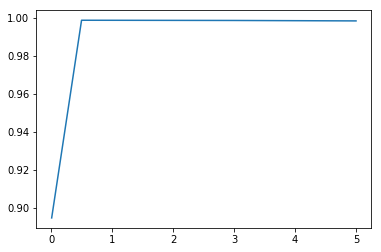

In [534]:
plt.plot(lambdas,val_perf)
#plt.plot(train_perf)

In [536]:
np.max(val_perf)

0.9987839950587736

In [537]:
#best lambda from first cut
est = lambdas[np.argmax(val_perf)]

In [547]:
lambdas2 = np.linspace(est/2,est*2/3,7)
val_perf2 = []
train_perf2 = []

for this_lam in lambdas2:
    
    X_incomplete_normalized = votes_test2.copy()
    X_filled_softimpute = fancyimpute.SoftImpute(shrinkage_value = this_lam,max_iters=250, verbose=True, min_value =0, max_value = 1).fit_transform(X_incomplete_normalized)
    val_perf2.append((X_filled_softimpute[mask1].round() == votes[mask1]).sum()/mask1.sum())

[SoftImpute] Max Singular Value of X_init = 296.311475
[SoftImpute] Iter 1: observed MAE=0.004818 rank=664
[SoftImpute] Iter 2: observed MAE=0.004825 rank=664
[SoftImpute] Iter 3: observed MAE=0.004833 rank=664
[SoftImpute] Iter 4: observed MAE=0.004840 rank=664
[SoftImpute] Iter 5: observed MAE=0.004848 rank=664
[SoftImpute] Iter 6: observed MAE=0.004855 rank=664
[SoftImpute] Iter 7: observed MAE=0.004863 rank=664
[SoftImpute] Iter 8: observed MAE=0.004871 rank=664
[SoftImpute] Iter 9: observed MAE=0.004880 rank=664
[SoftImpute] Iter 10: observed MAE=0.004888 rank=664
[SoftImpute] Iter 11: observed MAE=0.004896 rank=664
[SoftImpute] Iter 12: observed MAE=0.004905 rank=664
[SoftImpute] Iter 13: observed MAE=0.004914 rank=664
[SoftImpute] Iter 14: observed MAE=0.004923 rank=664
[SoftImpute] Iter 15: observed MAE=0.004932 rank=664
[SoftImpute] Iter 16: observed MAE=0.004941 rank=664
[SoftImpute] Iter 17: observed MAE=0.004951 rank=664
[SoftImpute] Iter 18: observed MAE=0.004960 rank=664


[SoftImpute] Iter 154: observed MAE=0.003195 rank=306
[SoftImpute] Iter 155: observed MAE=0.003176 rank=304
[SoftImpute] Iter 156: observed MAE=0.003158 rank=302
[SoftImpute] Iter 157: observed MAE=0.003140 rank=300
[SoftImpute] Iter 158: observed MAE=0.003123 rank=299
[SoftImpute] Iter 159: observed MAE=0.003105 rank=297
[SoftImpute] Iter 160: observed MAE=0.003088 rank=296
[SoftImpute] Iter 161: observed MAE=0.003071 rank=294
[SoftImpute] Iter 162: observed MAE=0.003055 rank=293
[SoftImpute] Iter 163: observed MAE=0.003039 rank=293
[SoftImpute] Iter 164: observed MAE=0.003023 rank=290
[SoftImpute] Iter 165: observed MAE=0.003007 rank=288
[SoftImpute] Iter 166: observed MAE=0.002992 rank=287
[SoftImpute] Iter 167: observed MAE=0.002977 rank=287
[SoftImpute] Iter 168: observed MAE=0.002962 rank=284
[SoftImpute] Iter 169: observed MAE=0.002948 rank=283
[SoftImpute] Iter 170: observed MAE=0.002933 rank=282
[SoftImpute] Iter 171: observed MAE=0.002919 rank=282
[SoftImpute] Iter 172: obser

[SoftImpute] Iter 55: observed MAE=0.005313 rank=578
[SoftImpute] Iter 56: observed MAE=0.005308 rank=575
[SoftImpute] Iter 57: observed MAE=0.005302 rank=573
[SoftImpute] Iter 58: observed MAE=0.005297 rank=571
[SoftImpute] Iter 59: observed MAE=0.005292 rank=568
[SoftImpute] Iter 60: observed MAE=0.005285 rank=565
[SoftImpute] Iter 61: observed MAE=0.005278 rank=562
[SoftImpute] Iter 62: observed MAE=0.005270 rank=559
[SoftImpute] Iter 63: observed MAE=0.005262 rank=555
[SoftImpute] Iter 64: observed MAE=0.005253 rank=553
[SoftImpute] Iter 65: observed MAE=0.005244 rank=551
[SoftImpute] Iter 66: observed MAE=0.005234 rank=548
[SoftImpute] Iter 67: observed MAE=0.005223 rank=544
[SoftImpute] Iter 68: observed MAE=0.005212 rank=541
[SoftImpute] Iter 69: observed MAE=0.005200 rank=538
[SoftImpute] Iter 70: observed MAE=0.005189 rank=536
[SoftImpute] Iter 71: observed MAE=0.005177 rank=532
[SoftImpute] Iter 72: observed MAE=0.005164 rank=529
[SoftImpute] Iter 73: observed MAE=0.005150 ra

[SoftImpute] Iter 208: observed MAE=0.002590 rank=240
[SoftImpute] Iter 209: observed MAE=0.002583 rank=239
[SoftImpute] Iter 210: observed MAE=0.002577 rank=239
[SoftImpute] Iter 211: observed MAE=0.002571 rank=238
[SoftImpute] Iter 212: observed MAE=0.002565 rank=238
[SoftImpute] Iter 213: observed MAE=0.002559 rank=238
[SoftImpute] Iter 214: observed MAE=0.002553 rank=238
[SoftImpute] Iter 215: observed MAE=0.002547 rank=237
[SoftImpute] Iter 216: observed MAE=0.002542 rank=236
[SoftImpute] Iter 217: observed MAE=0.002536 rank=235
[SoftImpute] Iter 218: observed MAE=0.002531 rank=235
[SoftImpute] Iter 219: observed MAE=0.002525 rank=234
[SoftImpute] Iter 220: observed MAE=0.002520 rank=234
[SoftImpute] Iter 221: observed MAE=0.002514 rank=234
[SoftImpute] Iter 222: observed MAE=0.002509 rank=234
[SoftImpute] Iter 223: observed MAE=0.002504 rank=232
[SoftImpute] Iter 224: observed MAE=0.002499 rank=232
[SoftImpute] Iter 225: observed MAE=0.002494 rank=232
[SoftImpute] Iter 226: obser

[SoftImpute] Iter 110: observed MAE=0.004313 rank=372
[SoftImpute] Iter 111: observed MAE=0.004282 rank=370
[SoftImpute] Iter 112: observed MAE=0.004250 rank=365
[SoftImpute] Iter 113: observed MAE=0.004218 rank=363
[SoftImpute] Iter 114: observed MAE=0.004186 rank=359
[SoftImpute] Iter 115: observed MAE=0.004155 rank=357
[SoftImpute] Iter 116: observed MAE=0.004124 rank=354
[SoftImpute] Iter 117: observed MAE=0.004094 rank=351
[SoftImpute] Iter 118: observed MAE=0.004063 rank=348
[SoftImpute] Iter 119: observed MAE=0.004032 rank=345
[SoftImpute] Iter 120: observed MAE=0.004002 rank=343
[SoftImpute] Iter 121: observed MAE=0.003972 rank=339
[SoftImpute] Iter 122: observed MAE=0.003942 rank=337
[SoftImpute] Iter 123: observed MAE=0.003913 rank=335
[SoftImpute] Iter 124: observed MAE=0.003885 rank=332
[SoftImpute] Iter 125: observed MAE=0.003856 rank=329
[SoftImpute] Iter 126: observed MAE=0.003829 rank=327
[SoftImpute] Iter 127: observed MAE=0.003801 rank=324
[SoftImpute] Iter 128: obser

[SoftImpute] Iter 10: observed MAE=0.005717 rank=664
[SoftImpute] Iter 11: observed MAE=0.005729 rank=664
[SoftImpute] Iter 12: observed MAE=0.005741 rank=664
[SoftImpute] Iter 13: observed MAE=0.005754 rank=664
[SoftImpute] Iter 14: observed MAE=0.005767 rank=664
[SoftImpute] Iter 15: observed MAE=0.005780 rank=664
[SoftImpute] Iter 16: observed MAE=0.005793 rank=663
[SoftImpute] Iter 17: observed MAE=0.005805 rank=662
[SoftImpute] Iter 18: observed MAE=0.005816 rank=661
[SoftImpute] Iter 19: observed MAE=0.005826 rank=659
[SoftImpute] Iter 20: observed MAE=0.005836 rank=658
[SoftImpute] Iter 21: observed MAE=0.005845 rank=656
[SoftImpute] Iter 22: observed MAE=0.005852 rank=653
[SoftImpute] Iter 23: observed MAE=0.005860 rank=652
[SoftImpute] Iter 24: observed MAE=0.005867 rank=650
[SoftImpute] Iter 25: observed MAE=0.005876 rank=648
[SoftImpute] Iter 26: observed MAE=0.005882 rank=646
[SoftImpute] Iter 27: observed MAE=0.005888 rank=643
[SoftImpute] Iter 28: observed MAE=0.005893 ra

[SoftImpute] Iter 164: observed MAE=0.003074 rank=255
[SoftImpute] Iter 165: observed MAE=0.003062 rank=253
[SoftImpute] Iter 166: observed MAE=0.003049 rank=251
[SoftImpute] Iter 167: observed MAE=0.003037 rank=251
[SoftImpute] Iter 168: observed MAE=0.003025 rank=250
[SoftImpute] Iter 169: observed MAE=0.003013 rank=249
[SoftImpute] Iter 170: observed MAE=0.003002 rank=248
[SoftImpute] Iter 171: observed MAE=0.002991 rank=247
[SoftImpute] Iter 172: observed MAE=0.002980 rank=246
[SoftImpute] Iter 173: observed MAE=0.002969 rank=246
[SoftImpute] Iter 174: observed MAE=0.002958 rank=245
[SoftImpute] Iter 175: observed MAE=0.002948 rank=245
[SoftImpute] Iter 176: observed MAE=0.002938 rank=244
[SoftImpute] Iter 177: observed MAE=0.002928 rank=243
[SoftImpute] Iter 178: observed MAE=0.002919 rank=242
[SoftImpute] Iter 179: observed MAE=0.002909 rank=241
[SoftImpute] Iter 180: observed MAE=0.002900 rank=241
[SoftImpute] Iter 181: observed MAE=0.002891 rank=240
[SoftImpute] Iter 182: obser

[SoftImpute] Iter 65: observed MAE=0.005888 rank=511
[SoftImpute] Iter 66: observed MAE=0.005865 rank=507
[SoftImpute] Iter 67: observed MAE=0.005841 rank=503
[SoftImpute] Iter 68: observed MAE=0.005816 rank=498
[SoftImpute] Iter 69: observed MAE=0.005790 rank=494
[SoftImpute] Iter 70: observed MAE=0.005763 rank=490
[SoftImpute] Iter 71: observed MAE=0.005735 rank=486
[SoftImpute] Iter 72: observed MAE=0.005706 rank=482
[SoftImpute] Iter 73: observed MAE=0.005676 rank=477
[SoftImpute] Iter 74: observed MAE=0.005646 rank=473
[SoftImpute] Iter 75: observed MAE=0.005613 rank=468
[SoftImpute] Iter 76: observed MAE=0.005580 rank=463
[SoftImpute] Iter 77: observed MAE=0.005547 rank=460
[SoftImpute] Iter 78: observed MAE=0.005513 rank=455
[SoftImpute] Iter 79: observed MAE=0.005478 rank=451
[SoftImpute] Iter 80: observed MAE=0.005443 rank=446
[SoftImpute] Iter 81: observed MAE=0.005407 rank=442
[SoftImpute] Iter 82: observed MAE=0.005371 rank=438
[SoftImpute] Iter 83: observed MAE=0.005334 ra

[SoftImpute] Iter 218: observed MAE=0.002718 rank=220
[SoftImpute] Iter 219: observed MAE=0.002714 rank=219
[SoftImpute] Iter 220: observed MAE=0.002710 rank=218
[SoftImpute] Iter 221: observed MAE=0.002705 rank=218
[SoftImpute] Iter 222: observed MAE=0.002701 rank=218
[SoftImpute] Iter 223: observed MAE=0.002697 rank=218
[SoftImpute] Iter 224: observed MAE=0.002692 rank=217
[SoftImpute] Iter 225: observed MAE=0.002688 rank=217
[SoftImpute] Iter 226: observed MAE=0.002684 rank=216
[SoftImpute] Iter 227: observed MAE=0.002680 rank=216
[SoftImpute] Iter 228: observed MAE=0.002676 rank=216
[SoftImpute] Iter 229: observed MAE=0.002672 rank=216
[SoftImpute] Iter 230: observed MAE=0.002668 rank=215
[SoftImpute] Iter 231: observed MAE=0.002664 rank=215
[SoftImpute] Iter 232: observed MAE=0.002660 rank=215
[SoftImpute] Iter 233: observed MAE=0.002656 rank=215
[SoftImpute] Iter 234: observed MAE=0.002653 rank=214
[SoftImpute] Iter 235: observed MAE=0.002649 rank=214
[SoftImpute] Iter 236: obser

[SoftImpute] Iter 120: observed MAE=0.003982 rank=291
[SoftImpute] Iter 121: observed MAE=0.003952 rank=290
[SoftImpute] Iter 122: observed MAE=0.003923 rank=286
[SoftImpute] Iter 123: observed MAE=0.003894 rank=285
[SoftImpute] Iter 124: observed MAE=0.003866 rank=284
[SoftImpute] Iter 125: observed MAE=0.003839 rank=282
[SoftImpute] Iter 126: observed MAE=0.003812 rank=280
[SoftImpute] Iter 127: observed MAE=0.003786 rank=278
[SoftImpute] Iter 128: observed MAE=0.003761 rank=278
[SoftImpute] Iter 129: observed MAE=0.003737 rank=275
[SoftImpute] Iter 130: observed MAE=0.003712 rank=273
[SoftImpute] Iter 131: observed MAE=0.003689 rank=271
[SoftImpute] Iter 132: observed MAE=0.003665 rank=270
[SoftImpute] Iter 133: observed MAE=0.003643 rank=269
[SoftImpute] Iter 134: observed MAE=0.003621 rank=268
[SoftImpute] Iter 135: observed MAE=0.003599 rank=266
[SoftImpute] Iter 136: observed MAE=0.003578 rank=265
[SoftImpute] Iter 137: observed MAE=0.003557 rank=263
[SoftImpute] Iter 138: obser

[SoftImpute] Iter 23: observed MAE=0.006718 rank=644
[SoftImpute] Iter 24: observed MAE=0.006725 rank=641
[SoftImpute] Iter 25: observed MAE=0.006729 rank=637
[SoftImpute] Iter 26: observed MAE=0.006733 rank=634
[SoftImpute] Iter 27: observed MAE=0.006734 rank=630
[SoftImpute] Iter 28: observed MAE=0.006736 rank=627
[SoftImpute] Iter 29: observed MAE=0.006738 rank=625
[SoftImpute] Iter 30: observed MAE=0.006739 rank=620
[SoftImpute] Iter 31: observed MAE=0.006740 rank=617
[SoftImpute] Iter 32: observed MAE=0.006739 rank=614
[SoftImpute] Iter 33: observed MAE=0.006739 rank=610
[SoftImpute] Iter 34: observed MAE=0.006738 rank=608
[SoftImpute] Iter 35: observed MAE=0.006736 rank=604
[SoftImpute] Iter 36: observed MAE=0.006733 rank=600
[SoftImpute] Iter 37: observed MAE=0.006728 rank=596
[SoftImpute] Iter 38: observed MAE=0.006723 rank=592
[SoftImpute] Iter 39: observed MAE=0.006717 rank=589
[SoftImpute] Iter 40: observed MAE=0.006711 rank=585
[SoftImpute] Iter 41: observed MAE=0.006703 ra

[SoftImpute] Iter 177: observed MAE=0.003081 rank=224
[SoftImpute] Iter 178: observed MAE=0.003073 rank=223
[SoftImpute] Iter 179: observed MAE=0.003066 rank=223
[SoftImpute] Iter 180: observed MAE=0.003059 rank=223
[SoftImpute] Iter 181: observed MAE=0.003052 rank=223
[SoftImpute] Iter 182: observed MAE=0.003045 rank=222
[SoftImpute] Iter 183: observed MAE=0.003038 rank=222
[SoftImpute] Iter 184: observed MAE=0.003032 rank=220
[SoftImpute] Iter 185: observed MAE=0.003025 rank=220
[SoftImpute] Iter 186: observed MAE=0.003019 rank=220
[SoftImpute] Iter 187: observed MAE=0.003012 rank=219
[SoftImpute] Iter 188: observed MAE=0.003006 rank=219
[SoftImpute] Iter 189: observed MAE=0.003000 rank=219
[SoftImpute] Iter 190: observed MAE=0.002994 rank=219
[SoftImpute] Iter 191: observed MAE=0.002988 rank=219
[SoftImpute] Iter 192: observed MAE=0.002982 rank=219
[SoftImpute] Iter 193: observed MAE=0.002976 rank=218
[SoftImpute] Iter 194: observed MAE=0.002971 rank=217
[SoftImpute] Iter 195: obser

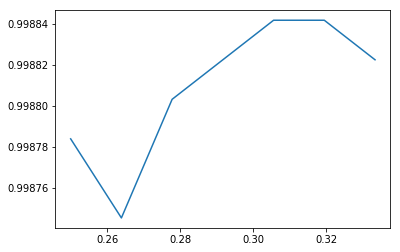

In [548]:
plt.plot(lambdas2,val_perf2)

In [550]:
best_lambda = lambdas2[np.array(val_perf2).argmax()]
best_lambda

0.3055555555555555

In [551]:
#val preformance
np.max(val_perf2)

0.9988419000559748

In [552]:
#test performance
X_incomplete_normalized = votes_test2.copy()
X_final= fancyimpute.SoftImpute(shrinkage_value = best_lambda, max_iters=250, verbose=False, min_value =0, max_value = 1).fit_transform(X_incomplete_normalized)
print("performance on test set:")
(X_final[mask2].round() == votes[mask2]).sum()/mask2.sum()

performance in test set:


0.9987052139295791

In [1246]:
UN, SN, VN = np.linalg.svd(X_final)

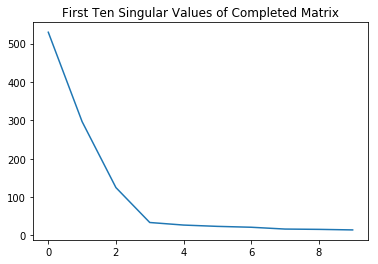

In [1250]:
plt.plot(SN[:10])
plt.title("First Ten Singular Values of Completed Matrix")
plt.savefig("sig_vals.png")

In [565]:
### Now NMF Analysis ###
from sklearn.decomposition import NMF
alphas = np.linspace(0,10,10)
l1_ratios = [.5]

params = []
perf3 = []

for a_1 in alphas:
    for l1 in l1_ratios:
        params.append((a_1,l1))
        
        model = NMF(n_components=2, init='nndsvd', alpha = a_1, l1_ratio = l1)
        W = model.fit_transform(X_final)
        H = model.components_
        perf3.append((np.dot(W,H).round()[mask1] == votes[mask1]).sum()/mask1.sum())

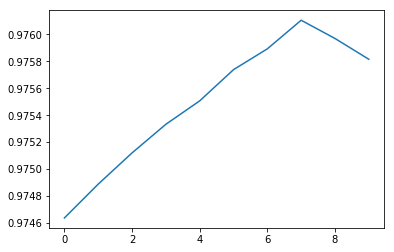

In [566]:
plt.plot(perf3)

In [1251]:
np.max(perf3)

0.976104537821614

In [1256]:
a_final, l1_final = params[np.argmax(perf3)]
model = NMF(n_components=2, init='nndsvd', alpha = a_final, l1_ratio = l1_final)
W1 = model.fit_transform(X_final)
H1 = model.components_
print("Test Performance:")
(np.dot(W1,H1).round()[mask2] == votes[mask2]).sum()/mask2.sum()

Test Performance:


0.9751285123487806

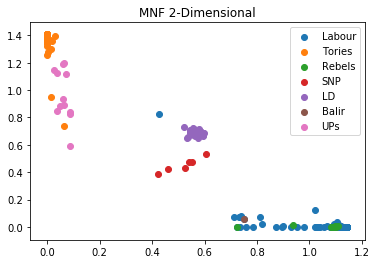

In [1257]:
plt.scatter(W1[:,0][~oppos],W1[:,1][~oppos], label='Labour')
plt.scatter(W1[:,0][cons],W1[:,1][cons], label='Tories')
plt.scatter(W1[:,0][rebels],W1[:,1][rebels], label='Rebels')
plt.scatter(W1[:,0][snp],W1[:,1][snp], label = 'SNP')
plt.scatter(W1[:,0][ld],W1[:,1][ld], label='LD')
#plt.scatter(W[:,x1][names == 'Corbyn, Jeremy '],W[:,x2][names == 'Corbyn, Jeremy '])
plt.scatter(W1[:,0][names == 'Blair, Tony '],W1[:,1][names == 'Blair, Tony '], label='Balir')
plt.scatter(W1[:,0][dups],W1[:,1][dups],label='UPs')
plt.title("MNF 2-Dimensional")
plt.legend()
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig("nmf2.png",bbox_inches="tight")

In [1253]:
a_final, l1_final = params[np.argmax(perf3)]
model = NMF(n_components=3, init='nndsvd', alpha = 10, l1_ratio = 1)
W = model.fit_transform(X_final)
H = model.components_
print("Test Performance:")
print((np.dot(W,H).round()[mask2] == votes[mask2]).sum()/mask2.sum())
print("val Performance:")
print((np.dot(W,H).round()[mask1] == votes[mask1]).sum()/mask1.sum())

Test Performance:
0.9876318942526958
val Performance:
0.9879171572506708


In [1236]:
def nmf(x1,x2):
    plt.scatter(W[:,x1][~oppos],W[:,x2][~oppos], label='Labour',zorder = 8)
    plt.scatter(W[:,x1][cons],W[:,x2][cons], label='Tories')
    plt.scatter(W[:,x1][rebels],W[:,x2][rebels], label='Rebels',zorder = 10)
    plt.scatter(W[:,x1][snp],W[:,x2][snp], label='SNP')
    plt.scatter(W[:,x1][ld],W[:,x2][ld], label='LD')
    #plt.scatter(W[:,x1][names == 'Corbyn, Jeremy '],W[:,x2][names == 'Corbyn, Jeremy '])
    plt.scatter(W[:,x1][names == 'Blair, Tony '],W[:,x2][names == 'Blair, Tony '], label='Blair', zorder = 9)
    plt.scatter(W[:,x1][dups],W[:,x2][dups], label='UPs')
    plt.title("MNF 3-Dimensional, Dims " + str(x1) + " & " + str(x2))
    plt.xlabel("Dim " + str(x1))
    plt.ylabel("Dim " + str(x2))
    plt.legend()
    plt.savefig("nmf3" + str(x1) + str(x2) +".png",bbox_inches="tight")


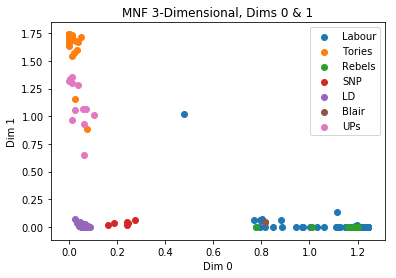

In [1227]:
nmf(0,1)

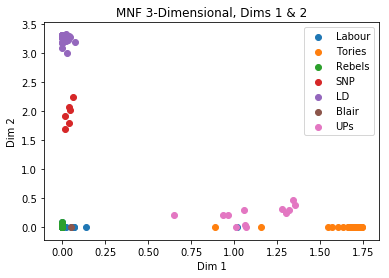

In [1228]:
###0 dimension is in or out of labor
###1 dim in social issues
###2 dim is electoral reform/changeing the UK
nmf(1,2)

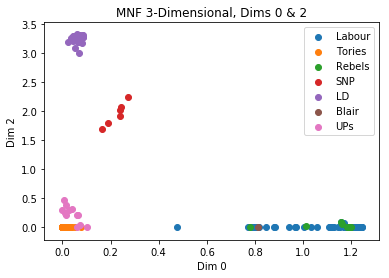

In [1229]:
nmf(0,2)

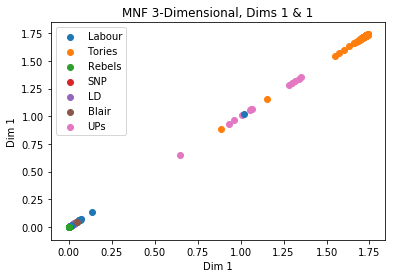

In [1237]:
nmf(1,1)

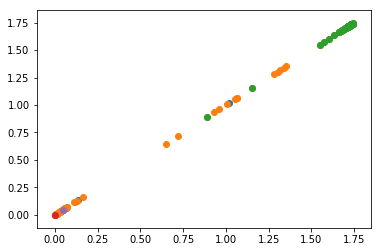

In [1230]:
plt.scatter(W[:,1][~oppos],W[:,1][~oppos])
plt.scatter(W[:,1][oppos],W[:,1])
plt.scatter(W[:,1][cons],W[:,1][cons])
plt.scatter(W[:,1][names == 'Corbyn, Jeremy '],W[:,1][names == 'Corbyn, Jeremy '])
plt.scatter(W[:,1][names == 'Blair, Tony '],W[:,1][names == 'Blair, Tony '])

In [809]:
U2,S2,V2 = randomized_svd(X_final - X_final.mean(axis = 0),2)
s_diag = np.diag(S2[:])
X_SVD2 = np.dot(np.dot(U2,s_diag),V2) + X_final.mean(axis = 0)

In [810]:
#val Perf
(X_SVD2.round()[mask1] == votes[mask1]).sum()/mask1.sum()

0.987975062247872

In [811]:
#test Perf
(X_SVD2.round()[mask2] == votes[mask2]).sum()/mask2.sum()

0.9878444710702277

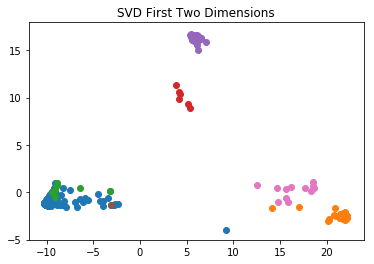

In [1224]:
plt.scatter(U2[~oppos][:,0]*S2[0],U2[~oppos][:,1]*S2[1], label='Labour')
plt.scatter(U2[cons][:,0]*S2[0],U2[cons][:,1]*S2[1], label='Tories')
plt.scatter(U2[rebels][:,0]*S2[0],U2[rebels][:,1]*S2[1], label='Rebels')
plt.scatter(U2[snp][:,0]*S2[0],U2[snp][:,1]*S2[1], label='SNP')
plt.scatter(U2[ld][:,0]*S2[0],U2[ld][:,1]*S2[1], label='LD')
plt.scatter(U2[names == 'Blair, Tony '][:,0]*S2[0],U2[names == 'Blair, Tony '][:,1]*S2[1], label='Blair')
plt.scatter(U2[dups][:,0]*S2[0],U2[dups][:,1]*S2[1], label='UPs')
plt.title("SVD First Two Dimensions")
#plt.legend()
plt.savefig('svd.png',bbox_inches="tight")
#SVD TODO
#how accurate on training data? How Accurate on complete matrix? How accurate on holdout data


In [1171]:
U3,S3,V3 = randomized_svd(X_final - X_final.mean(axis = 0),3)
s_diag1 = np.diag(S3[:])
X_SVD3 = np.dot(np.dot(U3,s_diag1),V3) + X_final.mean(axis = 0)

In [1172]:
#val Perf
(X_SVD3.round()[mask1] == votes[mask1]).sum()/mask1.sum()

0.9888629388716246

In [1173]:
#test Perf
(X_SVD3.round()[mask2] == votes[mask2]).sum()/mask2.sum()

0.9888300544969659

In [1207]:
def svd_graph(dim1,dim2):
    plt.scatter(U3[~oppos][:,dim1]*S3[dim1],U3[~oppos][:,dim2]*S3[dim2], label='Labour')
    plt.scatter(U3[cons][:,dim1]*S3[dim1],U3[cons][:,dim2]*S3[dim2], label='Tories')
    plt.scatter(U3[rebels][:,dim1]*S3[dim1],U3[rebels][:,dim2]*S3[dim2], label='Rebels')
    plt.scatter(U3[snp][:,dim1]*S3[dim1],U3[snp][:,dim2]*S3[dim2], label='SNP')
    plt.scatter(U3[ld][:,dim1]*S3[dim1],U3[ld][:,dim2]*S3[dim2], label='LD')
    plt.scatter(U3[names == 'Blair, Tony '][:,dim1]*S3[dim1],U3[names == 'Blair, Tony '][:,dim2]*S3[dim2], label='Blair')
    plt.scatter(U3[dups][:,dim1]*S3[dim1],U3[dups][:,dim2]*S3[dim2], label='UPs')
    plt.title("SVD Dimensions " + str(dim1) + " & " + str(dim2))
    plt.xlabel("Dim " + str(dim1))
    plt.ylabel("Dim " + str(dim2))
    plt.legend()
    plt.savefig('svd' +str(dim1)+str(dim2) + '.png')

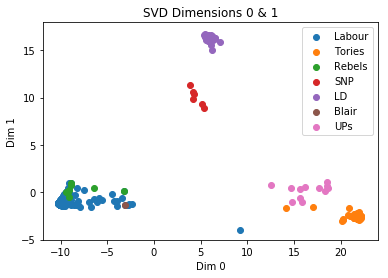

In [1208]:
svd_graph(0,1)

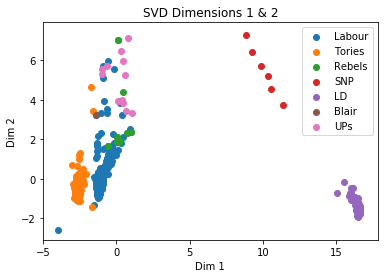

In [1209]:
svd_graph(1,2)

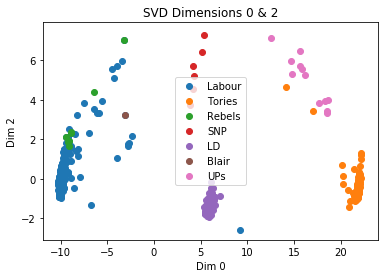

In [1210]:
svd_graph(0,2)

In [281]:
#most conservative member to use in R. 
(names == 'Paisley, Ian ').argmax() + 1

472

In [816]:
###Importing R Data

#data on legislators
rleg2d = pd.read_csv("2D_leg_oc_est.csv", quotechar='"', skipinitialspace=True)
#data on the bills
rc2d = pd.read_csv("2D_rc_oc_est.csv", quotechar='"', skipinitialspace=True)
#data on the yeas
rc2yea = pd.read_csv("2D_yea_oc_est.csv", quotechar='"', skipinitialspace=True)


rleg2d = rleg2d.iloc[:,1:].as_matrix()
rc2df = rc2d.iloc[:,1:3].as_matrix()
rc2dm = rc2d.iloc[:,-1].as_matrix()

#this gets me the total amount of yeas
rc2yea = rc2yea.iloc[:,1:5].as_matrix()
rc2yea_corr = rc2yea[:,0]
rc2yea_tot =  rc2yea_corr + rc2yea[:,1]

In [819]:
proj = np.dot(rleg2d,rc2df.T)
cut_sides = (proj > rc2dm)
#cur_cutt = cut_sides[:,1][~np.isnan(votes[:,0])]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [941]:
#True is for Pos, False for Negative
my_tally = []
python_index = []
r_index = []
for cut in range(proj.shape[1]):
    py_cut = cut
    if cut > 647:
        py_cut = py_cut + 1
    if cut > 1149:
        py_cut = py_cut + 1

    r_index.append(cut)
    python_index.append(py_cut)
    if (cut_sides[:,cut][train_loc[:,py_cut]]).sum() == rc2yea_tot[cut]:
        my_tally.append(True)
    elif (~cut_sides[:,cut][train_loc[:,py_cut]]).sum() == rc2yea_tot[cut]:
        my_tally.append(False)
    elif cut == 1128:
        my_tally.append(True)
    else:
        print('---')
        print("failure for cut",cut)
        print("Trues", (cut_sides[:,cut][train_loc[:,py_cut]]).sum())
        print("Falses", (~cut_sides[:,cut][train_loc[:,py_cut]]).sum())
        print("total trues", rc2yea_tot[cut])
        print("gap",np.min((np.abs((cut_sides[:,cut][train_loc[:,py_cut]]).sum()- rc2yea_tot[cut]), np.abs((~cut_sides[:,cut][train_loc[:,py_cut]]).sum() - rc2yea_tot[cut]))))
        print('votes total in python', train_loc[:,py_cut].sum())
        print('votes in R', rc2yea.sum(axis = 1)[cut])

    
        

---
failure for cut 1151
Trues 0
Falses 359
total trues nan
gap nan
votes total in python 359
votes in R nan
---
failure for cut 1152
Trues 143
Falses 222
total trues 137.0
gap 6.0
votes total in python 365
votes in R 359.0
---
failure for cut 1153
Trues 108
Falses 250
total trues 255.0
gap 5.0
votes total in python 358
votes in R 365.0
---
failure for cut 1154
Trues 98
Falses 257
total trues 107.0
gap 9.0
votes total in python 355
votes in R 358.0
---
failure for cut 1155
Trues 93
Falses 240
total trues 257.0
gap 17.0
votes total in python 333
votes in R 355.0
---
failure for cut 1156
Trues 14
Falses 224
total trues 221.0
gap 3.0
votes total in python 238
votes in R 333.0


IndexError: index 1279 is out of bounds for axis 1 with size 1279

In [1029]:
#this is the very convulted way to estimate predictions for OC
first_perf = []
second_perf = []

for test in range(5,647,25):
    
    r_index = np.array(r_index)
    r_index_new = r_index[r_index < test]
    oc_votes = cut_sides[:,r_index_new].copy()
    for this_it in r_index_new:
        for row in range(cut_sides.shape[0]):
            if cut_sides[row,this_it] == True and my_tally[this_it] == True:
                oc_votes[row,this_it] = 1
            elif cut_sides[row,this_it] == False and my_tally[this_it] == True:
                oc_votes[row,this_it] = 0
            elif cut_sides[row,this_it] == False and my_tally[this_it] == False:
                oc_votes[row,this_it] = 1
            elif cut_sides[row,this_it] == True and my_tally[this_it] == False:
                oc_votes[row,this_it] = 0
            else:
                print('fail')

    oc_votes = oc_votes.astype(int)

    count1 = 0
    count2 = 0
    equal1 = 0
    equal2 = 0
    
    for run in range(oc_votes.shape[0]):
        for run2 in range(oc_votes.shape[1]):
            if mask1[run,run2] == True:
                count1 +=1
                if oc_votes[run,run2] == votes[run,run2]:
                    equal1 +=1
            if mask2[run,run2] == True:
                count2 +=1
                if oc_votes[run,run2] == votes[run,run2]:
                    equal2 +=1
                    
    first_perf.append(equal1/count1)
    second_perf.append(equal2/count2)
        

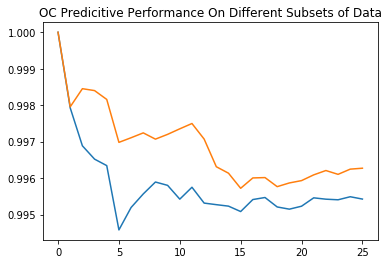

In [1245]:
plt.plot(first_perf, label='Validation Performance')
plt.plot(second_perf, label='Test Performance')
plt.title("OC Predicitive Performance On Different Subsets of Data")
plt.savefig('oc_perf.png',bbox_inches="tight")

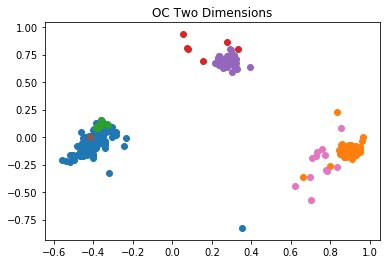

In [1225]:
plt.scatter(rleg2d[:,0][~oppos],rleg2d[:,1][~oppos], label='Labour')
plt.scatter(rleg2d[:,0][cons],rleg2d[:,1][cons], label='Tories')
plt.scatter(rleg2d[:,0][rebels],rleg2d[:,1][rebels], label='Rebels')
plt.scatter(rleg2d[:,0][snp],rleg2d[:,1][snp], label='SNP')
plt.scatter(rleg2d[:,0][ld],rleg2d[:,1][ld], label='LD')
plt.scatter(rleg2d[:,0][names == 'Blair, Tony '],rleg2d[:,1][names == 'Blair, Tony '], label='Blair')
plt.scatter(rleg2d[:,0][dups],rleg2d[:,1][dups], label='UPs')
plt.title("OC Two Dimensions")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.savefig('oc.png',bbox_inches="tight")

In [ ]:
    plt.scatter(U3[~oppos][:,dim1]*S3[dim1],U3[~oppos][:,dim2]*S3[dim2], label='Labour')
    plt.scatter(U3[cons][:,dim1]*S3[dim1],U3[cons][:,dim2]*S3[dim2], label='Tories')
    plt.scatter(U3[rebels][:,dim1]*S3[dim1],U3[rebels][:,dim2]*S3[dim2], label='Rebels')
    plt.scatter(U3[snp][:,dim1]*S3[dim1],U3[snp][:,dim2]*S3[dim2], label='SNP')
    plt.scatter(U3[ld][:,dim1]*S3[dim1],U3[ld][:,dim2]*S3[dim2], label='LD')
    plt.scatter(U3[names == 'Blair, Tony '][:,dim1]*S3[dim1],U3[names == 'Blair, Tony '][:,dim2]*S3[dim2], label='Blair')
    plt.scatter(U3[dups][:,dim1]*S3[dim1],U3[dups][:,dim2]*S3[dim2], label='UPs')
    plt.title("SVD Dimensions " + str(dim1) + " & " + str(dim2))
    plt.xlabel("Dim " + str(dim1))
    plt.ylabel("Dim " + str(dim2))
    plt.legend()
    plt.savefig('svd' +str(dim1)+str(dim2) + '.png')

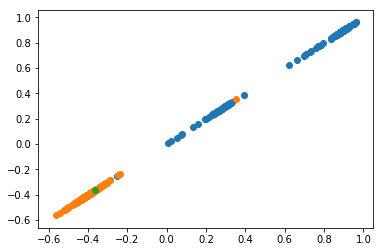

In [1049]:
plt.scatter(rleg2d[:,0][oppos],rleg2d[:,0][oppos])
plt.scatter(rleg2d[:,0][~oppos],rleg2d[:,0][~oppos])
plt.scatter(rleg2d[:,0][names == 'Corbyn, Jeremy '],rleg2d[:,0][names == 'Corbyn, Jeremy '])

In [1041]:
###importing R 1D Data
rc1leg = pd.read_csv("1D_oc_est.csv", quotechar='"', skipinitialspace=True)
rc1leg = rc1leg.iloc[:,1].as_matrix()

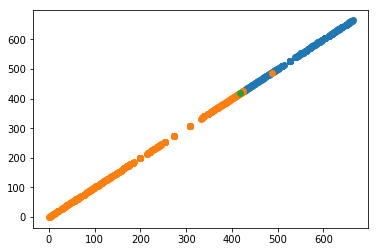

In [1048]:
plt.scatter(rc1leg[oppos],rc1leg[oppos])
plt.scatter(rc1leg[~oppos],rc1leg[~oppos])
plt.scatter(rc1leg[names == 'Corbyn, Jeremy '],rc1leg[names == 'Corbyn, Jeremy '])

In [1067]:
np.nansum(votes[~oppos,:])/(votes[~oppos,:] == 0).sum()

1.0638921790728963

In [1068]:
np.nansum(votes[oppos,:])/np.nansum(votes[oppos,:] == 0 )

1.0974007009345794

In [1069]:
np.nansum(votes[cons,:])/np.nansum(votes[cons,:] == 0 )

1.0936563619089381

In [1238]:
(~np.isnan(votes)).sum()

516941

In [1239]:
votes.shape

(664, 1279)

In [1242]:
(mask1[:,:647].sum() + mask1[:,:647].sum())/(mask1.sum() + mask1.sum())

0.5117064602675211